<a href="https://colab.research.google.com/github/nimnathw/supermarket-customer/blob/main/supermarket_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Supermarket customer segmentation
I use a Kaggle dataset to segment orders and customers based on seven and five features, respectively. After data cleaning and preprocessing, I run k-means algorithm to group supermarket orders. Then, I group the dataset by customer IDs and take the maximum values as the row values for a selected set of relevant features. I run k-means algorithm on the grouped customer data to identify customer clusters. Finally, I present the features associated with each order cluster and customer cluster.

#### The dataset consists of 2,019,501 Rows and 12 Columns. The columns are:

    order_id – (A unique number to identity the order)
    user_id - (A unique number to identify the user)
    order_number – (Number of the order)
    order_dow – (Day of the Week the order was made)
    order_hour_of_day – (Time of the order)
    days_since_prior_order - (History of the order)
    product_id – (Id of the product)
    add_to_cart_order – (Number of items added to cart)
    reordered – (If the reorder took place)
    department_id - (Unique number allocated to each department)
    department – (Names of the departments)
    product_name – (Name of the products)


In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , k_means

file ="/content/drive/MyDrive/Colab Notebooks/ECommerce_consumer behaviour.csv"

# Load file
data = pd.read_csv(file)


In [2]:
# Check data
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
# Check column data types
print(data.columns)
print(data.info())
print(data.user_id.nunique())

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB
None
105273


In [4]:
# Check for value counts of categorical variables

def get_value_counts(data_frame):
    for column in data_frame.columns:
        if data_frame[column].dtype == object:
            print("Column {}: \n \
                Unique Values: \n {} \n \
                Value Counts: \n {} \n \n".format(column, data_frame[column].unique(), data_frame[column].value_counts()))

print(get_value_counts(data))


Column department: 
                 Unique Values: 
 ['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other'] 
                 Value Counts: 
 produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: department, dtype: int64 
 

Column product_name: 
                 Unique Values: 
 ['baking ingredients' 'soy lactosefre

In [5]:
# Check for missing values
print(data.isnull().sum(axis=0))

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


In [6]:
# Replace missing values of the column "days_since_prior_order" to -1
data["days_since_prior_order"].fillna(-1, inplace=True)

# Convert the dype of column "days_since_prior_order" to int
data["days_since_prior_order"] = data["days_since_prior_order"].astype(int)
print(data.isnull().sum(axis=0))

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64


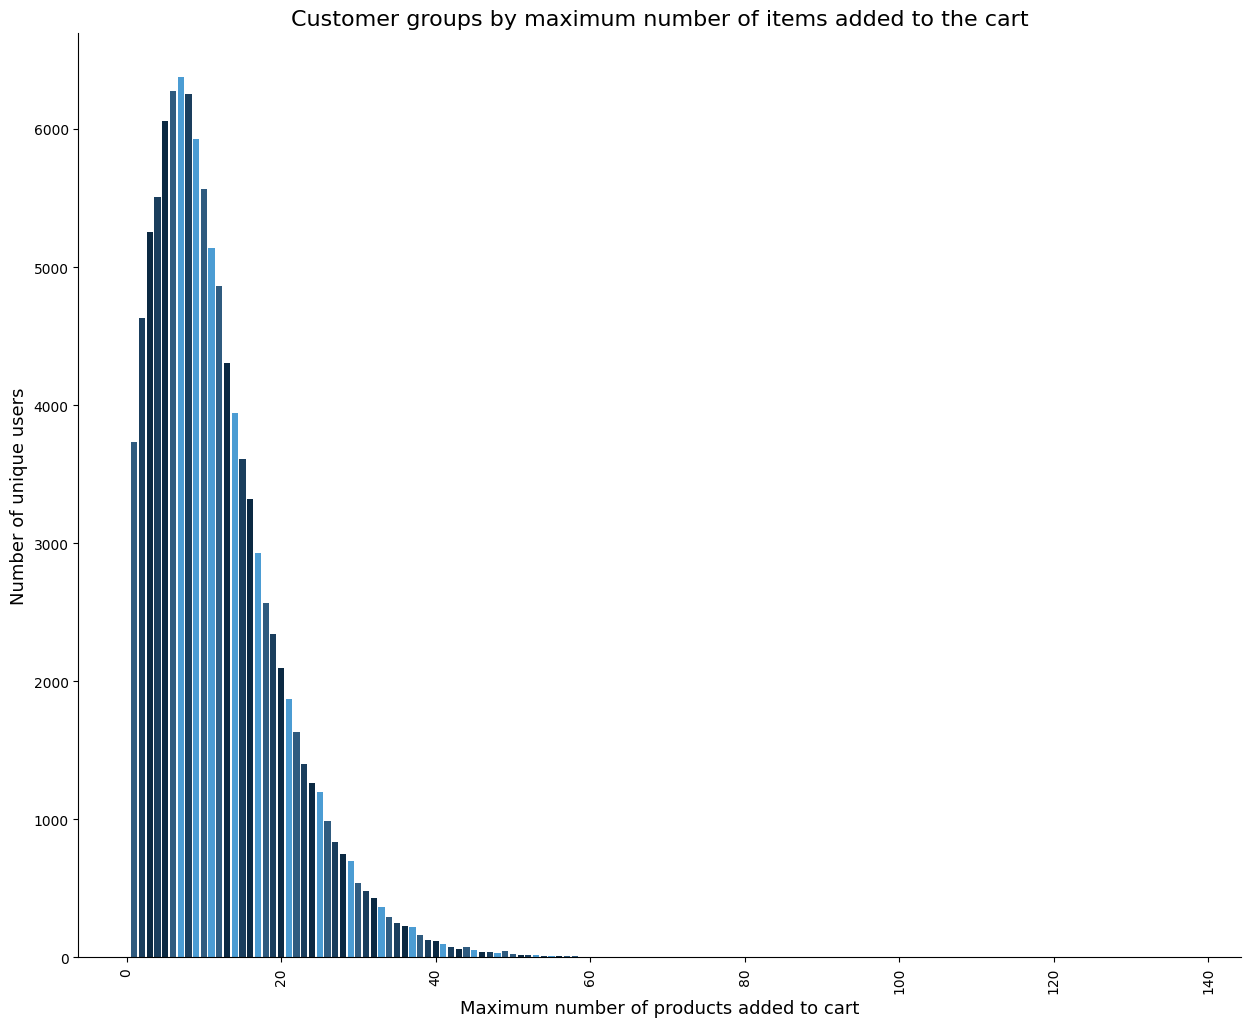

In [7]:
# Visualize customer groups by maximum number of items added to the cart
group_by_user = data.groupby("user_id")["add_to_cart_order"].aggregate("max").reset_index()
user_groups = group_by_user["add_to_cart_order"].value_counts()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 12))

# Define custom colors
custom_colors = ['#4B9CD3', '#2F5B7F', '#1A3E5D', '#0B2942']

# Plot the bar chart
ax.bar(user_groups.index, user_groups.values, color=custom_colors)

# Set background color to white
ax.set_facecolor('white')

# Add labels and titles
ax.set_ylabel('Number of unique users', fontsize=13)
ax.set_xlabel('Maximum number of products added to cart', fontsize=13)
ax.set_title('Customer groups by maximum number of items added to the cart', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation='vertical')

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()



In [8]:
# Group the orders by customer_id and sum the values
customer_data = data.groupby("user_id").max()

# Remove unnessary columns
data = data.drop(["department", "product_name", "department_id", "product_id", "order_id", "user_id", "order_number"], axis=1)
customer_data = customer_data.drop(["department_id", "product_id", "order_id","order_number", "department","product_name"], axis=1)
print(data.info())
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 5 columns):
 #   Column                  Dtype
---  ------                  -----
 0   order_dow               int64
 1   order_hour_of_day       int64
 2   days_since_prior_order  int64
 3   add_to_cart_order       int64
 4   reordered               int64
dtypes: int64(5)
memory usage: 77.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105273 entries, 2 to 206209
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_dow               105273 non-null  int64
 1   order_hour_of_day       105273 non-null  int64
 2   days_since_prior_order  105273 non-null  int64
 3   add_to_cart_order       105273 non-null  int64
 4   reordered               105273 non-null  int64
dtypes: int64(5)
memory usage: 4.8 MB
None


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Convert categorical column to numerical values
#data['department'] = le.fit_transform(data['department'])
#data['product_name'] = le.fit_transform(data['product_name'])
#data.info()

### Run K-means on order data.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

K-means inertia values: {2: 188385515.03402632, 3: 134630493.27665734, 4: 116269767.95407853, 5: 102190834.59746298, 6: 90835195.74011266, 7: 81247860.80309717, 8: 76643616.65591961, 9: 72367401.32299581, 10: 68357595.9880481, 11: 64642609.10889066, 12: 61774603.38839702, 13: 59048709.104517415, 14: 56799315.16399966, 15: 54716728.25502476, 16: 52826299.20274683, 17: 51120402.80342857, 18: 49431327.75859508, 19: 47868756.8603418}


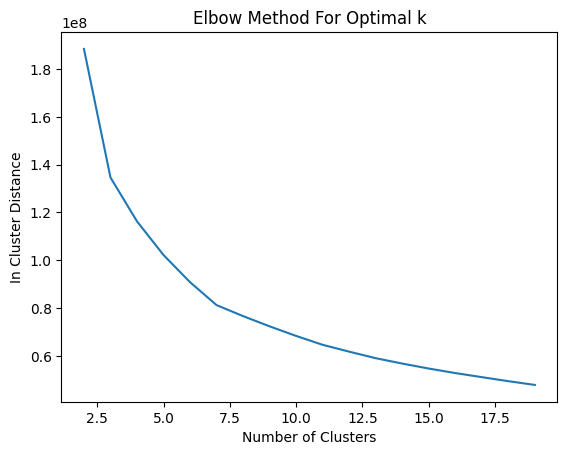

In [10]:
# Run K-Means to identify supermarket order groups
no_clusters = {}

for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data)
    no_clusters.update({i: km.inertia_})

print(f"K-means inertia values: {no_clusters}")

# Get the keys and values as separate lists
cluster = [key for key, value in no_clusters.items()]
inertia = [value for key, value in no_clusters.items()]

# Plot the inertia values against the cluster number
plt.plot(cluster, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('In Cluster Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
# Run the select K-means model with the selected number of clusters
km_selected = KMeans(7, random_state=0)
km_selected.fit(data)
predictions = km_selected.predict(data)
print(predictions)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 3]


In [12]:
# Get centroid values for each cluster
centroids = km_selected.cluster_centers_

# Create dataframe from centroid values
df = pd.DataFrame(centroids, columns=data.columns)

# Examine values of each column to determine characteristics related to each cluster
for i in range(km_selected.n_clusters):
    print(f"Cluster {i}:\n{df.iloc[i]}")

Cluster 0:
order_dow                  2.732667
order_hour_of_day         13.218097
days_since_prior_order     8.100601
add_to_cart_order         28.425961
reordered                  0.480188
Name: 0, dtype: float64
Cluster 1:
order_dow                 2.765293
order_hour_of_day         9.890396
days_since_prior_order    4.768259
add_to_cart_order         4.632842
reordered                 0.645836
Name: 1, dtype: float64
Cluster 2:
order_dow                  2.680763
order_hour_of_day         13.610291
days_since_prior_order    28.430895
add_to_cart_order          5.312586
reordered                  0.529743
Name: 2, dtype: float64
Cluster 3:
order_dow                  2.819785
order_hour_of_day         17.218356
days_since_prior_order     4.464773
add_to_cart_order          4.711544
reordered                  0.621099
Name: 3, dtype: float64
Cluster 4:
order_dow                  2.711700
order_hour_of_day         13.246553
days_since_prior_order     6.345755
add_to_cart_order         

### Run K-means on data grouped by user_id

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

K-means inertia values: {2: 11778457.769509453, 3: 8313133.880961843, 4: 7104354.967213955, 5: 6091067.060501737, 6: 5350193.679113516, 7: 4951379.619490614, 8: 4624280.002864263, 9: 4307855.276145555, 10: 4052574.2416656567, 11: 3824257.4147511553, 12: 3647939.8295335574, 13: 3476703.6403420763, 14: 3342006.165217145, 15: 3223110.866301787, 16: 3115394.429945641, 17: 3014800.8135944605, 18: 2919782.7061805823, 19: 2828197.0138556836}


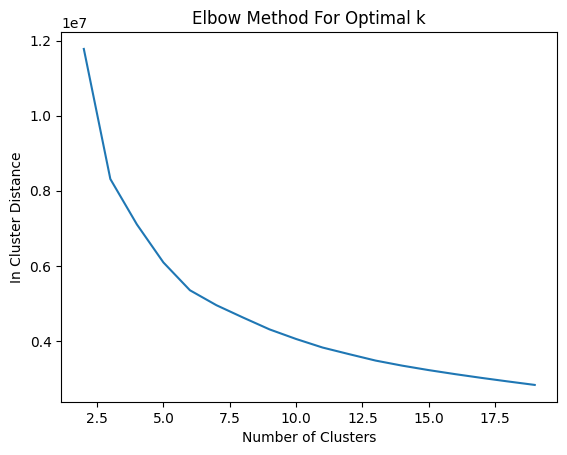

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 1 5 ... 4 2 3]
Cluster 0:
order_dow                  3.806155
order_hour_of_day         15.574239
days_since_prior_order    10.779188
add_to_cart_order         31.634201
reordered                  0.961136
Name: 0, dtype: float64
Cluster 1:
order_dow                  3.417012
order_hour_of_day         14.838666
days_since_prior_order    15.429841
add_to_cart_order          7.735736
reordered                  0.946987
Name: 1, dtype: float64
Cluster 2:
order_dow                  3.671058
order_hour_of_day         15.484581
days_since_prior_order     7.842623
add_to_cart_order         16.916365
reordered                  0.931181
Name: 2, dtype: float64
Cluster 3:
order_dow                  3.268724
order_hour_of_day         14.516749
days_since_prior_order    28.857685
add_to_cart_order          6.970768
reordered                  0.886232
Name: 3, dtype: float64
Cluster 4:
order_dow                  3.236002
order_hour_of_day         14.248132
days_since_prior_order     4.444580
add

In [13]:
# Run K-means algorithm on data grouped by customer
no_clusters = {}

for i in range(2,20):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(customer_data)
    no_clusters.update({i: km.inertia_})

print(f"K-means inertia values: {no_clusters}")

# Get the keys and values as separate lists
cluster = [key for key, value in no_clusters.items()]
inertia = [value for key, value in no_clusters.items()]

# Plot the inertia values against the cluster number
plt.plot(cluster, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('In Cluster Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

# Run the select K-means model with the selected number of clusters
km_selected = KMeans(6, random_state=0)
km_selected.fit(customer_data)
predictions = km_selected.predict(customer_data)
print(predictions)

# Get centroid values for each cluster
centroids = km_selected.cluster_centers_

# Create dataframe from centroid values
df = pd.DataFrame(centroids, columns=customer_data.columns)

# Examine values of each column to determine characteristics related to each cluster
for i in range(km_selected.n_clusters):
    print(f"Cluster {i}:\n{df.iloc[i]}")

#### Silhouette_score computation takes too long to complete.

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans clustering for different number of clusters
silhouette_scores = []
for n_clusters in range(4, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

# Plot the silhouette scores
plt.plot(range(2, 5), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Interpretation:
* There are seven distinct supermarket order types with different average values (centroid values) for the features: order_dow, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered, department, and product_name. 
* There are six distinct customer groups with different average values for each customer's maximum value for the  features: order_dow, order_hour_of_day, days_since_prior_order, add_to_cart_order, and reordered.